<h1 style="background-color:orange; text-align:center; font-family:TimesNewRoman; font-weight:bold">UK ACCIDENT REPORT DATA ANALYSIS</h1>

<h2 style="text-align:center; font-family:TimesNewRoman; font-weight:bold;">ANALYST: CHRISTIAN R. NOBLEJAS</h2>

<h1 style="text-align:center; font-family:TimesNewRoman;">IMPORTING LIBRARIES NEEDED</h1>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

<h1 style="text-align:center; font-family:TimesNewRoman;">IMPORT DATASETS</h1>

In [17]:
accident = pd.read_csv("datasets//accident_data.csv")

In [18]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [19]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [20]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

<h1 style="text-align:center; font-family:TimesNewRoman; font-weight:bold;">NULL VALUES</h1>

In [21]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown road condition')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1 style="text-align:center; font-family:TimesNewRoman; font-weight:bold;">CONVERT DATA TYPE OF COLUMNS</h1>

In [22]:
accident['Index'] = accident['Index'].astype('category')
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category') 
accident['District Area'] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [23]:
accident.dtypes

Index                      category
Accident_Severity          category
Accident Date                object
Latitude                    float64
Light_Conditions           category
District Area              category
Longitude                   float64
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
dtype: object

In [24]:
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].str.replace('/','-')
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [25]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'],dayfirst =True, errors = 'coerce')
accident.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h1 style="text-align:center; font-family:TimesNewRoman; font-weight:bold;">DETERMINING NULL VALUES AND FILL IT</h1>

In [26]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [27]:
accident['Year']=accident['Accident Date'].dt.year
accident['Month']=accident['Accident Date'].dt.month
accident['Day']=accident['Accident Date'].dt.day
accident['DayofWeek']=accident['Accident Date'].dt.dayofweek
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayofWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


In [28]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayofWeek                  0
dtype: int64

<h1 style="text-align:center; font-family:TimesNewRoman; font-size:50px">INSIGHTS</h1>

<h1>Q1: What is the most common accident severity category</h1>
<h2>Insight 1: The accident severity that has a highest record is Slight which has (563801) or 85.3% of 660679.</h2>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18152\629888091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


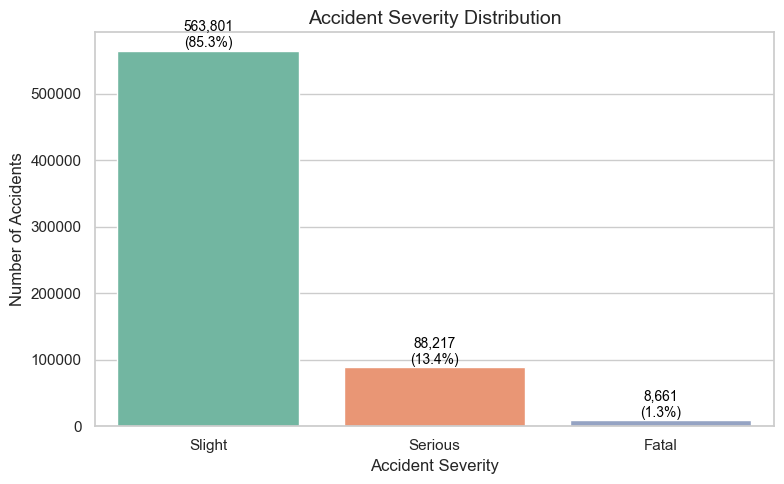

In [29]:
ac_sev = accident['Accident_Severity'].value_counts()
df_severity = ac_sev.reset_index()
df_severity.columns = ['Accident Severity', 'Count']
df_severity['Percentage'] = (df_severity['Count'] / df_severity['Count'].sum()) * 100
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    data=df_severity,
    x='Accident Severity',
    y='Count',
    palette='Set2',
    order=['Slight', 'Serious', 'Fatal'] 
)
for index, row in df_severity.iterrows():
    barplot.text(index, row['Count'] + max(df_severity['Count']) * 0.01, 
                 f"{row['Count']:,}\n({row['Percentage']:.1f}%)", 
                 color='black', ha="center", fontsize=10)
plt.title("Accident Severity Distribution", fontsize=14)
plt.xlabel("Accident Severity")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()



<h2>Q2:What vehicle type is most frequently involved in accidents which result in Fatal?</h2>
<h2>Insight 2: The most common vehicle that was involved in an accidents is Car which has result of 6577 fatal accidents</h2>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18152\168016708.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehicle_types = accident['Vehicle_Type'].groupby(accident['Accident_Severity']).value_counts().unstack()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18152\168016708.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


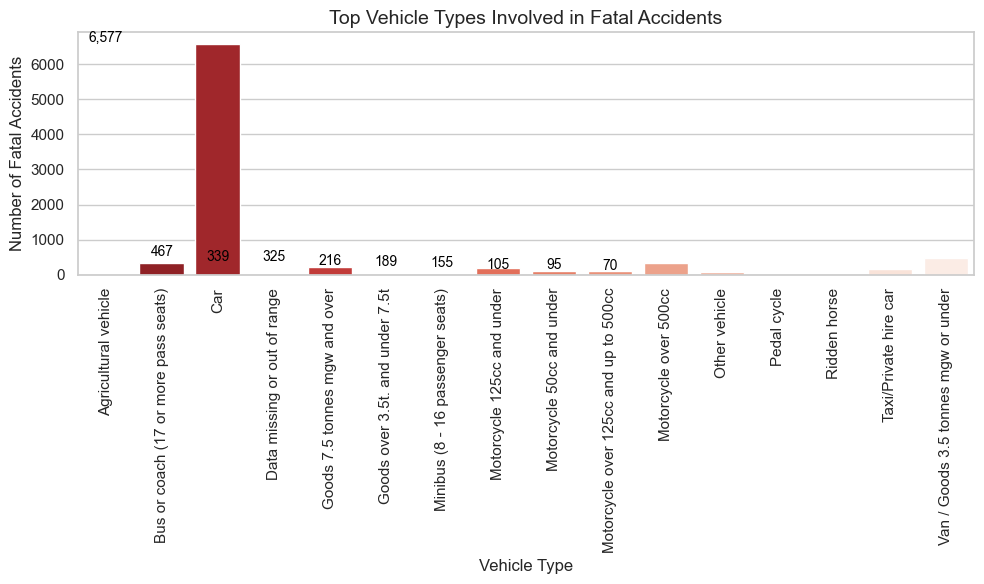

In [30]:
vehicle_types = accident['Vehicle_Type'].groupby(accident['Accident_Severity']).value_counts().unstack()
vehicle_types.head(10)

fatal_vehicles = vehicle_types.loc['Fatal'].sort_values(ascending=False)
top_fatal_vehicles = fatal_vehicles.head(10)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x=top_fatal_vehicles.index,
    y=top_fatal_vehicles.values,
    palette='Reds_r'
)
for index, value in enumerate(top_fatal_vehicles.values):
    barplot.text(index, value + max(top_fatal_vehicles.values) * 0.01, f"{value:,}", 
                 color='black', ha="center", fontsize=10)
plt.title("Top Vehicle Types Involved in Fatal Accidents", fontsize=14)
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Fatal Accidents")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<h2>Q3:On which road type do most car accidents occur?</h2>
<h2>Insight 3: Based on the result, Mostly car accidents occur on a single carriageways</h2>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18152\1900466925.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


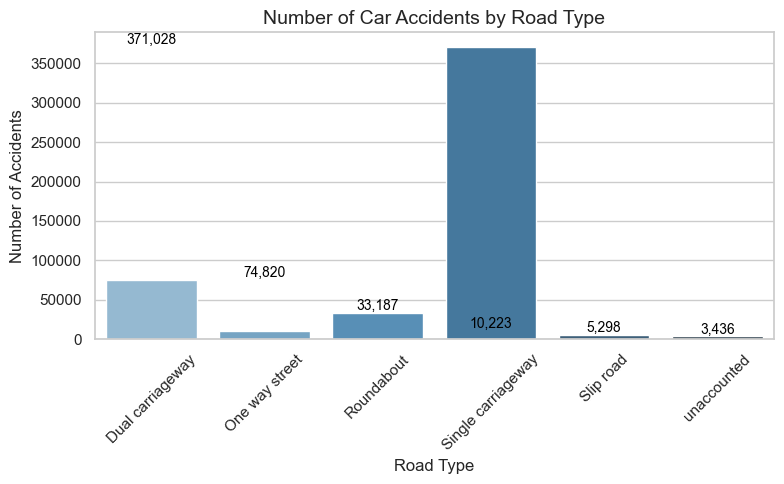

In [31]:
car_acc = accident[accident['Vehicle_Type'] == 'Car']
road_co = car_acc['Road_Type'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    x=road_co.index,
    y=road_co.values,
    palette='Blues_d'
)
for index, value in enumerate(road_co.values):
    barplot.text(index, value + max(road_co.values) * 0.01, f"{value:,}", color='black', ha='center', fontsize=10)

plt.title("Number of Car Accidents by Road Type", fontsize=14)
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2>Q4:On which road_surface do most car accidents occur?</h2>
<h2>Insight 4: Most car accidents occur on dry roads, It's either a human error or due to traffic load .</h2>


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18152\2862374099.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


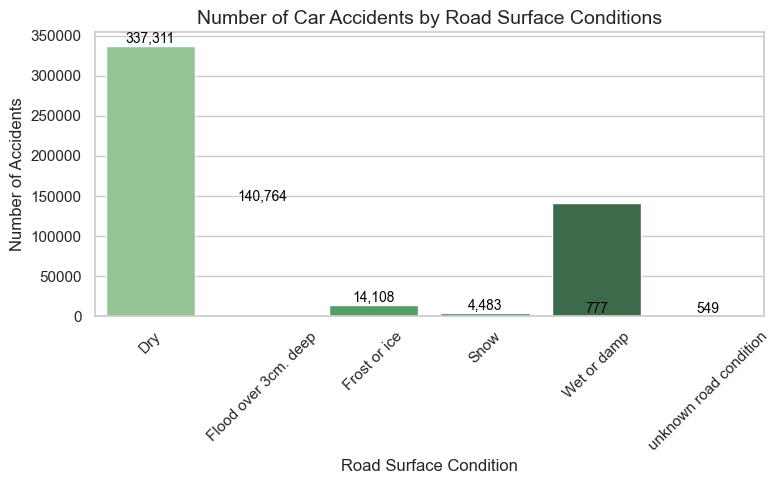

In [32]:
road_surface= car_acc['Road_Surface_Conditions'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    x=road_surface.index,
    y=road_surface.values,
    palette='Greens_d'
)
for index, value in enumerate(road_surface.values):
    barplot.text(index, value + max(road_surface.values) * 0.01, f"{value:,}", color='black', ha='center', fontsize=10)
plt.title("Number of Car Accidents by Road Surface Conditions", fontsize=14)
plt.xlabel("Road Surface Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




<h2>Q5: Which year got the highest record of Accidents?</h2>
<h2>Insight 5: On year 2019 got the Higher number or count of Accidents</h2>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18152\3317867352.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


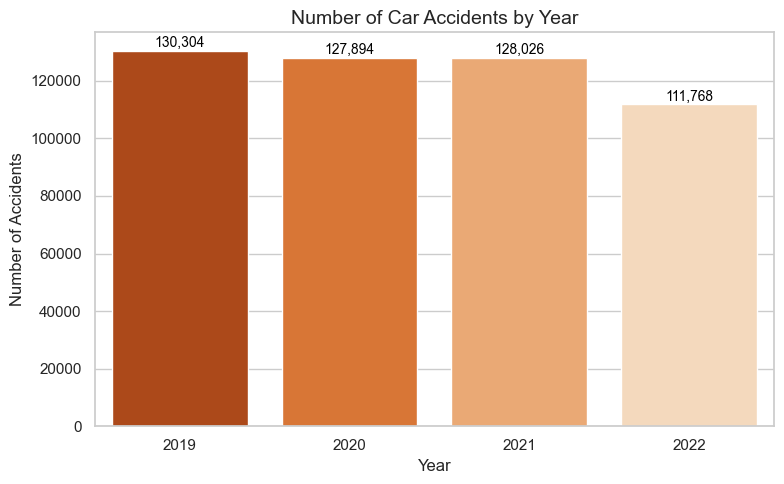

In [35]:
car_yr = car_acc['Year'].value_counts().sort_index()  
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    x=car_yr.index.astype(str),
    y=car_yr.values,
    palette='Oranges_r'
)
for index, value in enumerate(car_yr.values):
    barplot.text(index, value + max(car_yr.values) * 0.01, f"{value:,}", 
                 color='black', ha='center', fontsize=10)
plt.title("Number of Car Accidents by Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()



<h2>Q6: Does weather conditions affect a accidents?</h2>
<h2>Insight 6: Most car accidents occur in fine weather with no high winds, suggesting that human error.</h2>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18152\2093867513.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


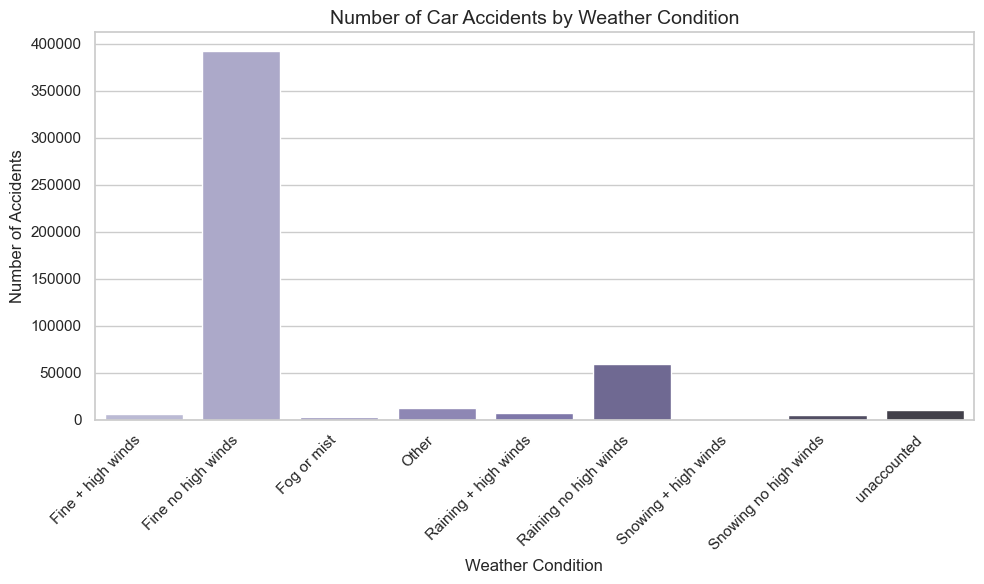

In [39]:
weather = car_acc['Weather_Conditions'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(
    x=weather.index,
    y=weather.values,
    palette='Purples_d'
)
plt.title("Number of Car Accidents by Weather Condition", fontsize=14)
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h2>Q7: How many fatal accident records occurred under fog or mist conditions?</h2>
<h2>Insight 7: The total number of Fatal accidents occured during fog or mist conditions is 82 which is 12.1% of 677 total accidents.</h2>

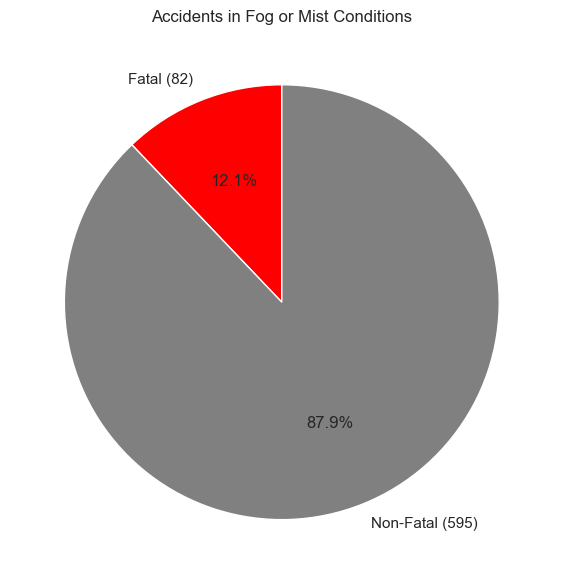

In [40]:
we_acc = accident[(accident['Weather_Conditions']== "Fog or mist") & (accident['Accident_Severity']=='Fatal')]
we_acc.shape[0]

fog_fatal = 82
fog_total = 677
fog_nonfatal = fog_total - fog_fatal

# Pie chart
labels = ['Fatal (82)', 'Non-Fatal (595)']
sizes = [fog_fatal, fog_nonfatal]
colors = ['red', 'gray']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'})
plt.title("Accidents in Fog or Mist Conditions")
plt.tight_layout()
plt.show()


<h2>Q8: How many fatal accident records occurred under fog or mist conditions?</h2>
<h2>Insight 8: The total number of Fatal accidents occurred during Fine no high winds conditions is 7100 which is 1.8% of total accident of 392668.</h2>

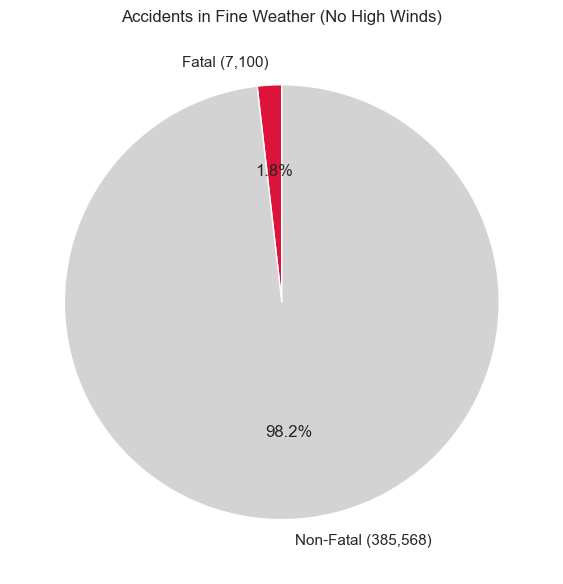

In [41]:
we_acc = accident[(accident['Weather_Conditions']== "Fine no high winds") & (accident['Accident_Severity']=='Fatal')]
we_acc.shape[0]

fine_fatal = 7100
fine_total = 392668
fine_nonfatal = fine_total - fine_fatal

# Pie chart
labels = ['Fatal (7,100)', 'Non-Fatal (385,568)']
sizes = [fine_fatal, fine_nonfatal]
colors = ['crimson', 'lightgray']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'})
plt.title("Accidents in Fine Weather (No High Winds)")
plt.tight_layout()
plt.show()

<h2> Q9: Which Year got the highest record of Fatal accidents?</h2>

<h2>Insight 9: In 2019, it had the highest record of Fatal accidents</h2>




C:\Users\Administrator\AppData\Local\Temp\ipykernel_18152\2470224731.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


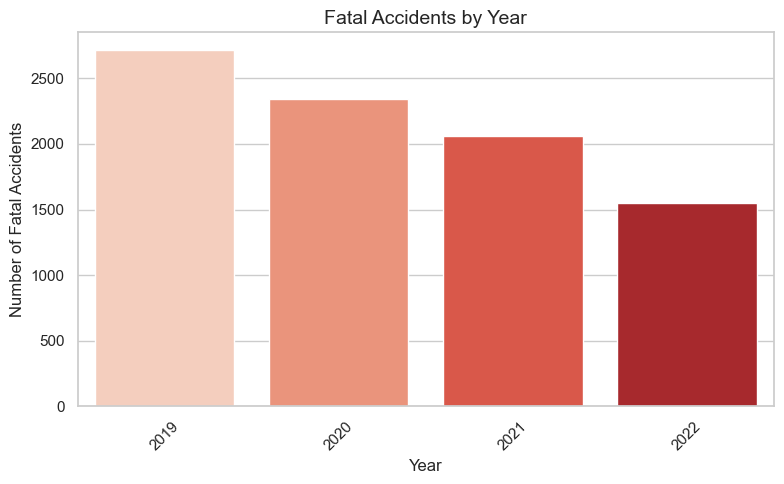

In [44]:
fatal_yr = accident[accident['Accident_Severity'] == 'Fatal'].groupby('Year').size()
fatal_yr_sorted = fatal_yr.sort_index()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

sns.barplot(
    x=fatal_yr_sorted.index.astype(str),
    y=fatal_yr_sorted.values,
    palette="Reds"
)

plt.title("Fatal Accidents by Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Fatal Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2> Q10: What are the top 5 District Areas that have the highest records of accidents?</h2>
<h2>Insight 10: This area got the highest record of accidents, these are Birmingham, Leeds, Manchester, Bradford, and Sheffield</h2>




In [72]:
dis_area = accident['District Area'].value_counts().head(5)
dis_area

District Area
Birmingham    13491
Leeds          8898
Manchester     6720
Bradford       6212
Sheffield      5710
Name: count, dtype: int64

<h2>Q11: Which District area on the top 5 has the highest fatality rate record?</h2>
<h2>Insight 11: The District with the highest record of Fatal accidents is Birmingham has 105 fatal accidents, while Sheffield has 38 fatal accidents.  </h2>

In [84]:

top5_districts = accident['District Area'].value_counts().head(5).index
fatal_accidents = accident[accident['Accident_Severity'] == 'Fatal']
fatal_top5 = fatal_accidents[fatal_accidents['District Area'].isin(top5_districts)]
fatal_counts_top5 = fatal_top5['District Area'].value_counts()
fatal_counts_top5



District Area
Birmingham              105
Leeds                    93
Bradford                 71
Manchester               49
Sheffield                38
                       ... 
Boston                    0
Bournemouth               0
Bracknell Forest          0
Barking and Dagenham      0
Braintree                 0
Name: count, Length: 422, dtype: int64

<h2>Q12: On the top 5 district areas, do the weather conditions affect the number of Fatal accidents?</h2>
<h2>Insight 11: Based on the results, Birmingham recorded 82 fatal accidents, accounting for 82.1% of the total 105 accidents in the area. </h2>

In [ ]:
fatal_accidents = accident[accident["Accident_Severity"] == "Fatal"]
fatal_counts_by_weather = fatal_accidents.groupby(["District Area", "Weather_Conditions"]).size().unstack()
top5_areas = accident['District Area'].value_counts().head(5).index  
fatal_counts_by_weather.loc[top5_areas]


<h2> Q13: On which area (Urban or Rural) had the highest fatality rate?</h2>

<h2>Rural areas have more fatal accidents than urban areas, even though urban areas have more total number of vehicles. </h2>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18152\3483873606.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ur_sev.index, y=ur_sev.values, palette='OrRd')


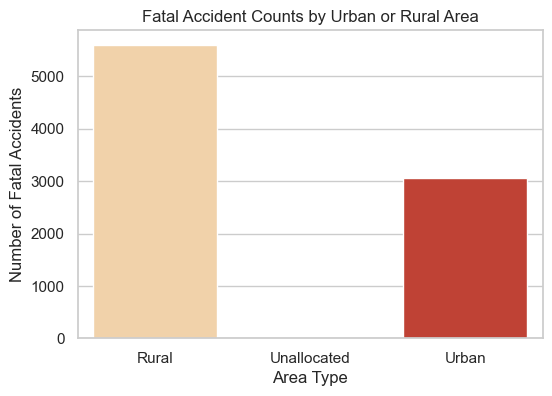

In [86]:
ur_sev = accident[accident['Accident_Severity'] == 'Fatal']['Urban_or_Rural_Area'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=ur_sev.index, y=ur_sev.values, palette='OrRd')
plt.title("Fatal Accident Counts by Urban or Rural Area")
plt.xlabel("Area Type")
plt.ylabel("Number of Fatal Accidents")
plt.show()



<h2>Q14: Do light conditions affect the severity of an accident?</h2>
<h2>Insight 14: Most fatal accidents happen in daylight due to reasons like traffic, but many also occur in total darkness without lighting. Serious and slight accidents are more common in  dark lighting.</h2>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18152\1980719071.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sev_light_casual = accident.groupby(['Accident_Severity', 'Light_Conditions'])['Number_of_Casualties'].sum().unstack()


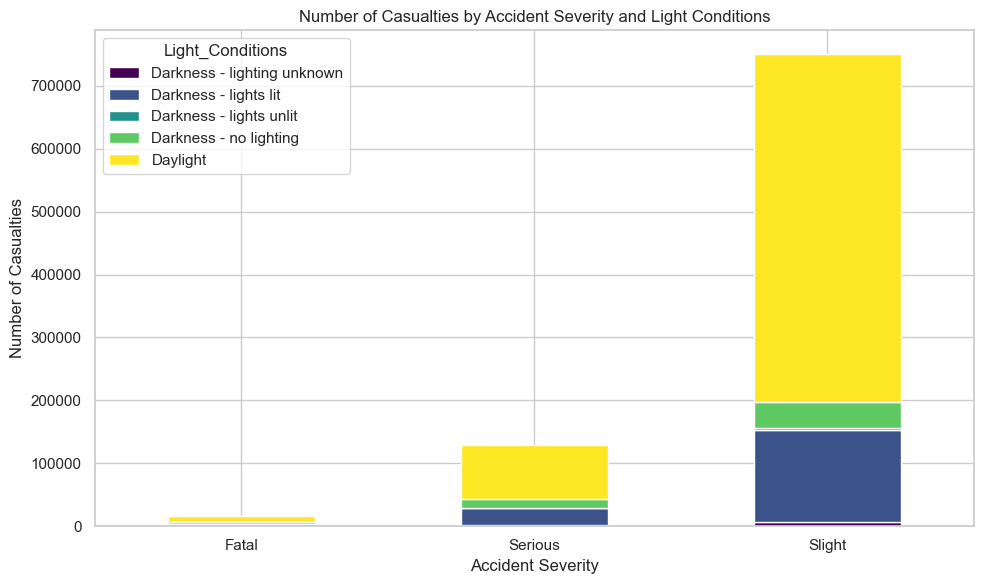

In [87]:
sev_light_casual = accident.groupby(['Accident_Severity', 'Light_Conditions'])['Number_of_Casualties'].sum().unstack()
sev_light_casual.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('Number of Casualties by Accident Severity and Light Conditions')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<h2>Q15: Do road surface conditions impact accidents in urban and rural areas?</h2>

<h3>Insight 15: Most accidents happen on dry roads, but wet conditions also cause many accidents. Rural areas have more accidents on icy roads than urban areas, likely due to less road maintenance.</h3>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18152\1594762990.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ruban_sur = accident.groupby('Urban_or_Rural_Area')['Road_Surface_Conditions'].value_counts().unstack()


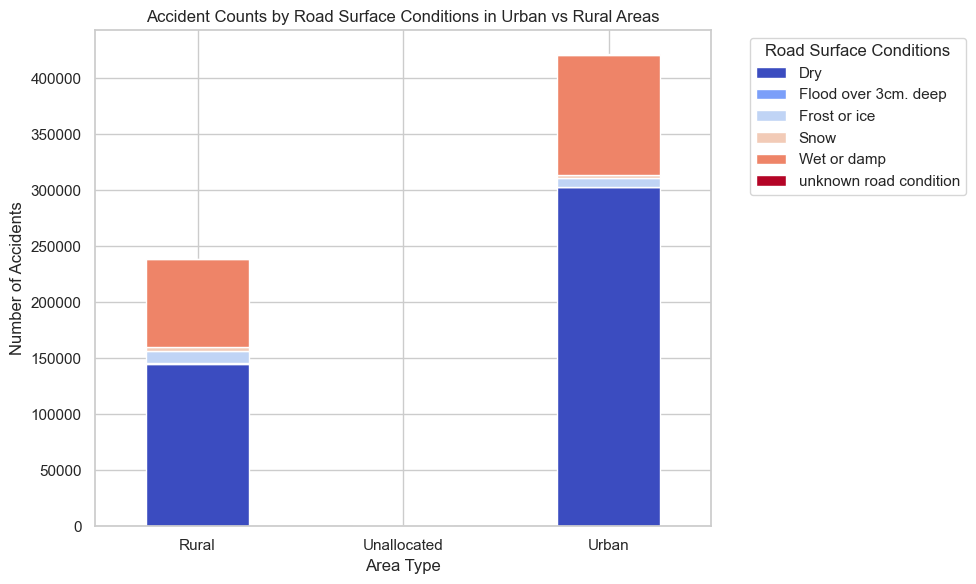

In [88]:
ruban_sur = accident.groupby('Urban_or_Rural_Area')['Road_Surface_Conditions'].value_counts().unstack()
ruban_sur.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title('Accident Counts by Road Surface Conditions in Urban vs Rural Areas')
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.legend(title='Road Surface Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h2>Q16: What month had the highest number of accidents?</h2>

<h2>Insight 16: In November had the highest number of accidents due to heavy traffic and christmas preparation.</h2>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18152\3708170631.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_labels, y=mon_acc.values, palette='viridis')


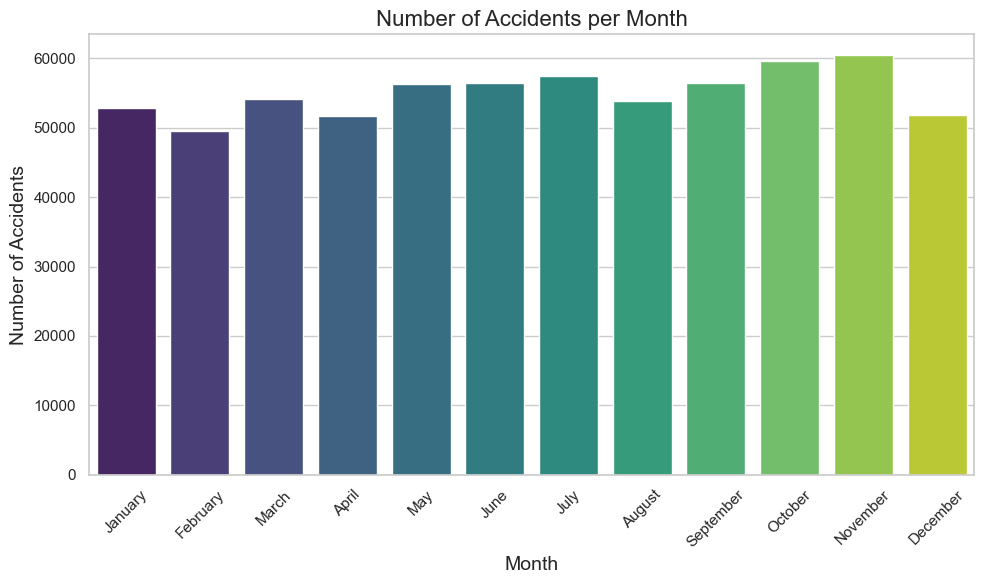

In [91]:

month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
mon_acc = accident['Month'].value_counts().sort_index()
month_labels = [month_names[m] for m in mon_acc.index]
plt.figure(figsize=(10,6))
sns.barplot(x=month_labels, y=mon_acc.values, palette='viridis')
plt.title('Number of Accidents per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h2>Insight 17: The total number of Casualties each year, In 2019 had the highest record og casualties</h2>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18152\3465326006.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tot_cas.index, y=tot_cas.values, palette='coolwarm')


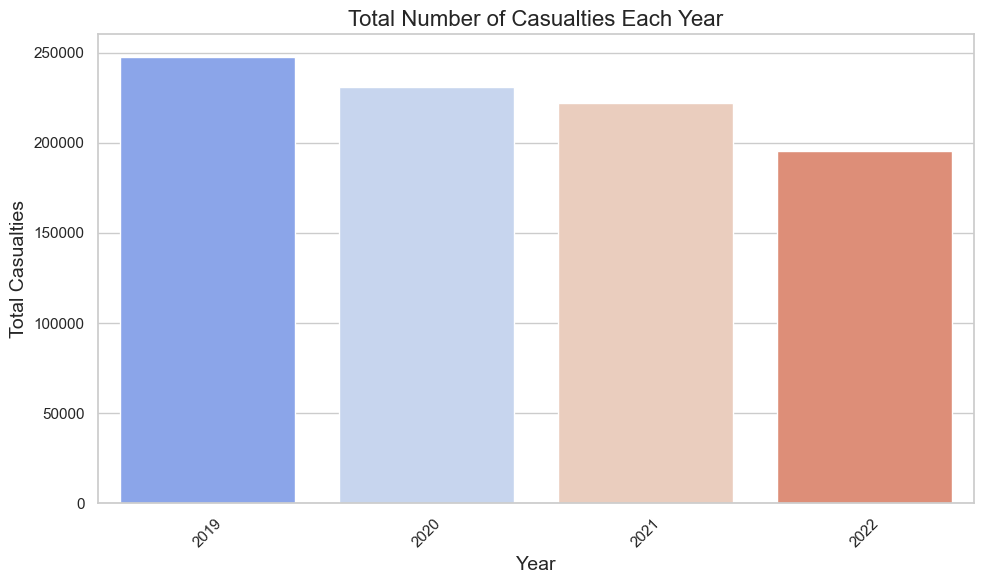

In [92]:
tot_cas = accident.groupby('Year')['Number_of_Casualties'].sum()

plt.figure(figsize=(10,6))
sns.barplot(x=tot_cas.index, y=tot_cas.values, palette='coolwarm')

plt.title('Total Number of Casualties Each Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Casualties', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2> Q18: Which month has have highest accident rate?</h2>
<h2>Insight 18: November had the highest number of accidents in 2019, with 16,559 accidents, accounting for 1.38% of the total 1,198,591 casualties.</h2>


In [93]:
yr_2019 = accident[accident['Year'] == 2019]


In [94]:
yr_2019['Month'].sum()

np.int64(1198591)

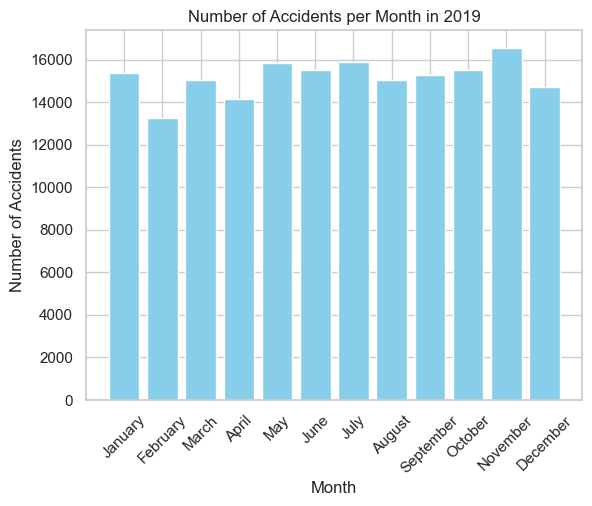

In [100]:

month_dict = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Count accidents by month in 2019 and sort by month number
month_counts = yr_2019['Month'].value_counts().sort_index()

# Map month numbers to names using the dictionary
months = [month_dict[m] for m in month_counts.index]

plt.bar(months, month_counts.values, color='skyblue')
plt.title('Number of Accidents per Month in 2019')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


<h2>Insight 19: On year 2019, Dry road was the most dangerous road surface as it gained 125,348 accidents</h2>



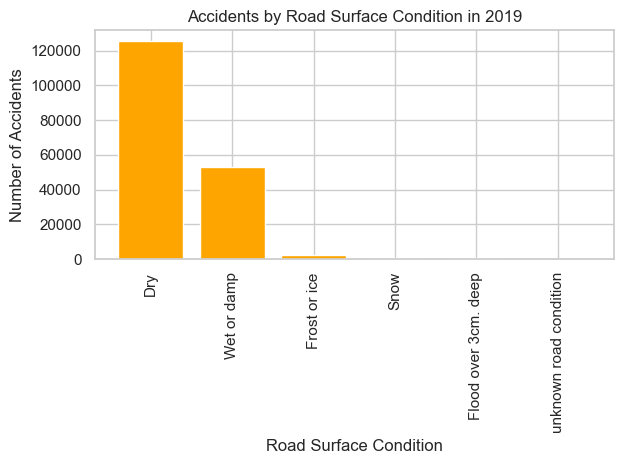

In [102]:
we_con = yr_2019['Road_Surface_Conditions'].value_counts()

# Plot bar chart
plt.bar(we_con.index, we_con.values, color='orange')
plt.title('Accidents by Road Surface Condition in 2019')
plt.xlabel('Road Surface Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<h2>Insight 20: In 2019, Accidents are more likely to happen in Dry road areas. Let's assume that it was human error, vehicle malfunction, or Distracted while driving.
</h2>



C:\Users\Administrator\AppData\Local\Temp\ipykernel_18152\2364419575.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  road_sev= yr_2019.groupby('Road_Surface_Conditions')['Accident_Severity'].value_counts()


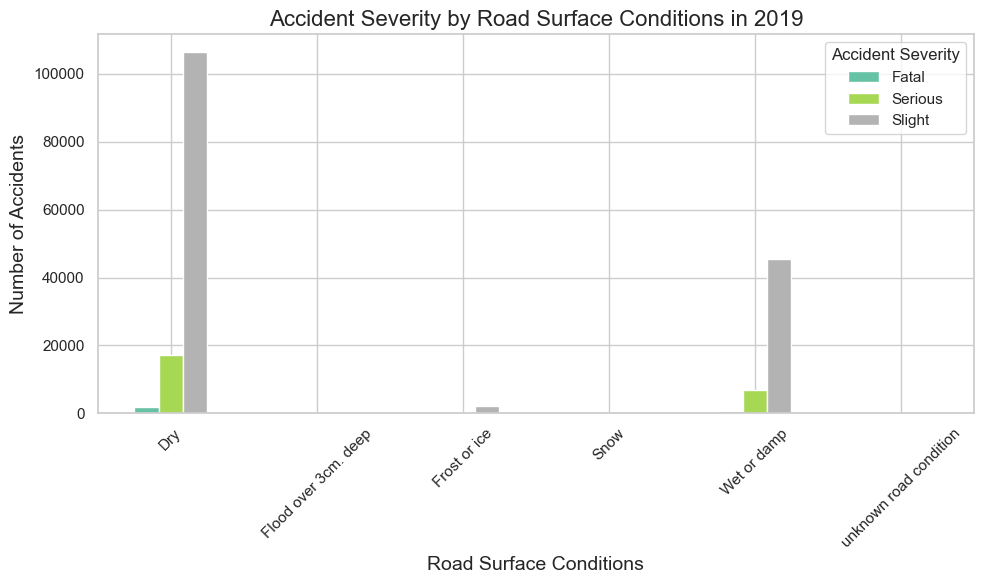

In [103]:
road_sev= yr_2019.groupby('Road_Surface_Conditions')['Accident_Severity'].value_counts()
road_sev_unstacked = road_sev.unstack().fillna(0)

# Plot
road_sev_unstacked.plot(kind='bar', figsize=(10,6), stacked=False, colormap='Set2')

plt.title('Accident Severity by Road Surface Conditions in 2019', fontsize=16)
plt.xlabel('Road Surface Conditions', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Accident Severity')
plt.tight_layout()
plt.show()